**Import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [8]:
data =pd.read_csv('/content/breast-cancer.csv')


In [10]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


**Explore data**

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

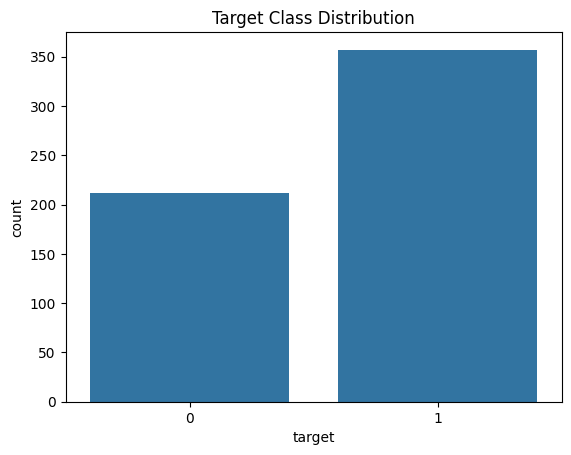

In [11]:
print(df.head())
print(df['target'].value_counts())
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.show()


**Data preprossesing**

In [12]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Train SVM with Linear Kernel**

In [13]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

y_pred_linear = model_linear.predict(X_test)

print("Linear Kernel Classification Report:")
print(classification_report(y_test, y_pred_linear))


Linear Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



**Train SVM with RBF Kernel**

In [14]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)

y_pred_rbf = model_rbf.predict(X_test)

print("RBF Kernel Classification Report:")
print(classification_report(y_test, y_pred_rbf))


RBF Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**Hyperparameter Tuning (GridSearch)**

In [15]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

y_pred_grid = grid.predict(X_test)
print("Tuned Model Report:")
print(classification_report(y_test, y_pred_grid))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1,

**Cross-Validation Score**

In [16]:
scores = cross_val_score(SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma']),
                         X_scaled, y, cv=5)
print("Cross-validation accuracy: ", scores.mean())


Cross-validation accuracy:  0.9789318428815401


** Visualize Decision Boundary**

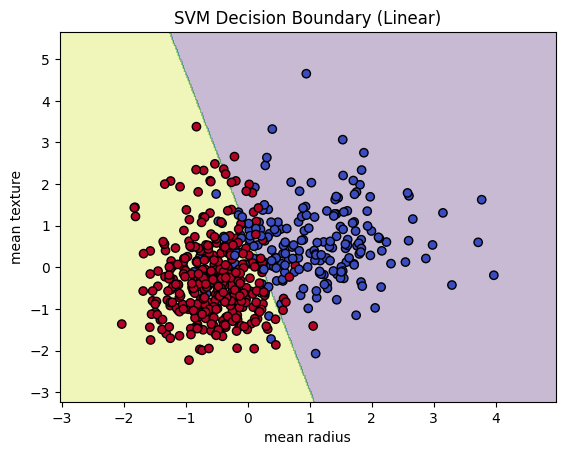

In [17]:
# Choose only two features for 2D visualization
X_vis = df[['mean radius', 'mean texture']]
y_vis = df['target']

X_vis_scaled = StandardScaler().fit_transform(X_vis)

model_vis = SVC(kernel='linear')
model_vis.fit(X_vis_scaled, y_vis)

# Plot decision boundary
def plot_svm_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel("mean radius")
    plt.ylabel("mean texture")
    plt.title("SVM Decision Boundary (Linear)")
    plt.show()

plot_svm_boundary(X_vis_scaled, y_vis, model_vis)
